In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
data=np.genfromtxt('mlfolder/CSV_Files/outliersData1.csv',delimiter=',',skip_header=True)

In [3]:
data.shape

(100, 2)

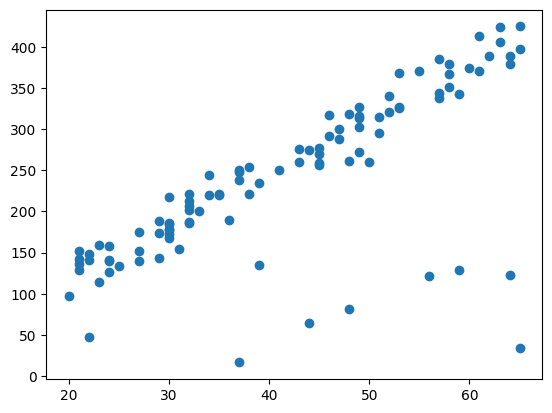

In [4]:
plt.scatter(data[:,0],data[:,1])

In [6]:
X=data[:,0].reshape(-1,1)
y=data[:,1].reshape(-1,1)
from sklearn.linear_model import LinearRegression
lReg=LinearRegression()
lReg.fit(X,y)

LinearRegression()

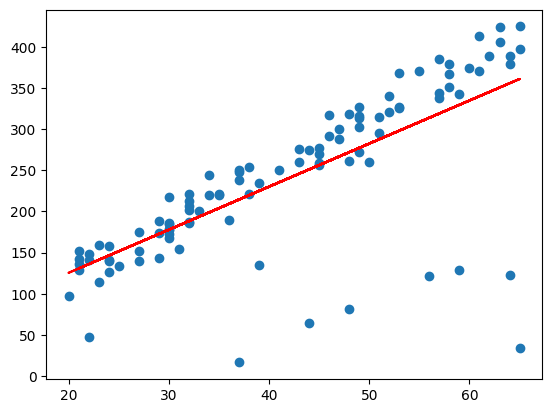

In [8]:
plt.scatter(X,y)
plt.plot(X,lReg.predict(X),color='red')

In [9]:
lReg.score(X,y)

0.5248005756263661

**as r^2 score is not because there are data outliers which impact's regression line**
**so we remove data points which has moe than 10% error**

In [12]:
def get_error(point):
    return point[2]
def outlierCleaner(y_pred,x,y):
    errors=[]
    for i in range(len(y)):
        errors.append(abs(y[i]-y_pred[i]))
    #combine,x,y,errrors as a tuple
    data=[]
    for i in range(len(x)):
        data.append((x[i],y[i],errors[i]))
    data = sorted(data, key=get_error)
    n = int(len(data) * 0.1)
    cleaned_data = data[:-n]
    return cleaned_data

In [13]:
cleaned=outlierCleaner(lReg.predict(X),X,y)

In [14]:
cleaned_X,cleaned_y,err=zip(*cleaned)

In [15]:
type(cleaned_X)

tuple

In [16]:
cleanedX=np.array(cleaned_X).reshape(-1,1)

In [17]:
cleanedy=np.array(cleaned_y).reshape(-1,1)

In [18]:
cleanedX.shape

(90, 1)

In [19]:
cleanedy.shape

(90, 1)

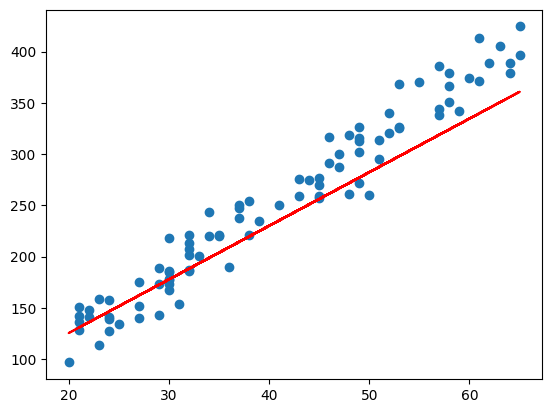

In [20]:
plt.scatter(cleanedX,cleanedy)
plt.plot(cleanedX,lReg.predict(cleanedX),color='red')

In [21]:
lReg.score(cleanedX,cleanedy)

0.8794507460907902

In [22]:
def outlierCleaner(y_predicted, x, y):
    """
        Delete 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual y).
        Return a list of tuples named cleaned_data where 
        each tuple is of the form (x, y, error).
    """
    
    cleaned_data = []
    import numpy as np
    error = np.abs(y-y_predicted)
    n=int(len(error)*0.1)
    ind=np.argpartition(error.ravel(),-n)[-n:]
    x_clean=np.delete(x,ind)
    y_clean=np.delete(y,ind)
    err=np.delete(error,ind)
    cleaned_data=zip(x_clean,y_clean,err)
    return cleaned_data